In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.3f}'.format

In [4]:
ds=pd.read_csv('us_construction_clean.csv')

In [5]:
X = ds.iloc[:,[21,22,23,24,25,27]]
y = ds.iloc[:, 28]

In [6]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y, test_size=0.30)

X_train=torch.from_numpy(X_trainN.values.astype(np.float32))
y_train=torch.from_numpy(y_trainN.values.astype(np.float32)).reshape(-1,1)
X_test=torch.from_numpy(X_testN.values.astype(np.float32))
y_test=torch.from_numpy(y_testN.values.astype(np.float32)).reshape(-1,1)

In [7]:
n_samples, n_features = X_train.shape

In [8]:
model=nn.Linear(n_features, 1)

lr=0.00001
n_epoch=1000

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)
train_loss=[]
test_loss=[]


for epoch in range(n_epoch):
    y_pred=model(X_train)
    loss=lossfunc(y_train, y_pred)
    loss.backward()
    train_loss.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

    [w,b]=model.parameters()

    with torch.inference_mode():
        y_test_pred=model(X_test)
        lost_test=lossfunc(y_test, y_test_pred)
        test_loss.append(lost_test)


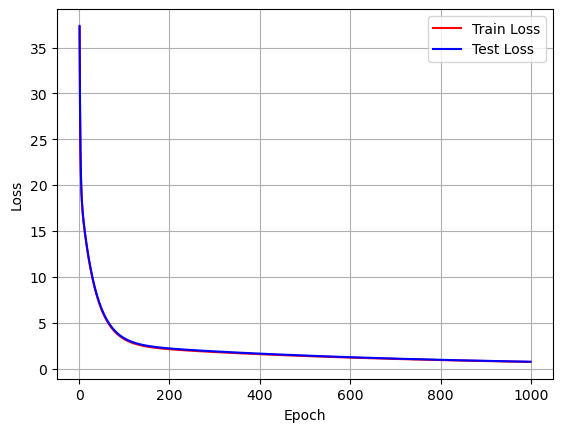

In [9]:
fig=plt.figure()
xv=np.arange(1, n_epoch,1)
plt.plot(xv,train_loss[1:], 'r', label="Train Loss")
plt.plot(xv,test_loss[:-1], 'b', label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
fig.show()

In [10]:
#Graph is not showing test loss

In [11]:
with torch.inference_mode():
    y_test_pred=model(X_test)
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred))

Coefficient of determination: -405.09
